Q1) We have the min and max temperatures in a city In India for each months of the year.\
We would like to find a function to describe this and show it graphically, the dataset given below.\
Task:
1.fitting it to the periodic function\
2.plot the fit Data\
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25\
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
temp_max= np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])


## creting numpy as month
months = np.arange(12)

In [23]:
## Fitting into perodic functions

from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

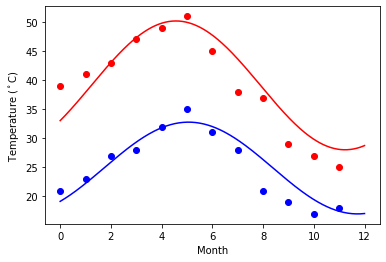

In [27]:
## Ploting the fit

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

Q2) This assignment is for visualization using matplotlib:\
data to use:\
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

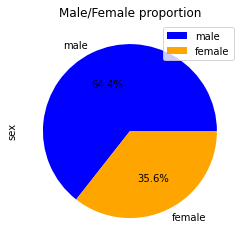

In [77]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

## Reading the file 
titanic = pd.read_csv(url)

#count of passengers by sex
gender= titanic['sex'].value_counts()
gender=pd.DataFrame(gender)

## ploting a pie plot 
gender.plot.pie(y='sex',colors = ['blue', 'orange'],autopct='%.1f%%', title='Male/Female proportion')

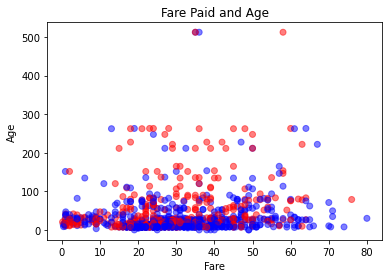

In [99]:
## Create the scatter plot

## Dropping NaN from coloum
titanic = titanic.dropna(subset=['sex'])

## Mapping the colour to gender
mapping = {'male' : 'blue', 'female' : 'red'}

## Ploting the scatter plot
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=titanic['sex'].map(mapping))
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Fare Paid and Age')
plt.show()